In [7]:
import pandas as pd
import scanpy as sc
import squidpy as sq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [8]:
adata = sc.read('anndata/mIHC_celltype.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 1695965 × 0
    obs: 'class', 'sample_ID', 'short_ID', 'Tumor_ID', 'Treatment', 'slide', 'ROI_factor_per_tumor', 'tum_factor_per_treatment'
    obsm: 'spatial'


In [9]:
#start from here; trying to bypass the creation of roi_results matrix
import pickle
with open("squidpy_4_roi_results_with_labels.pkl", "rb") as f:
    data = pickle.load(f)
    roi_results = data["roi_results"]
    all_class = data["all_class"]

In [2]:
#sanity check roi_results matrix
print(f"Loaded roi_results keys: {list(roi_results.keys())[:5]}")
print(f"Loaded all_class: {all_class}")

Loaded roi_results keys: ['Control_BT00011_ROI_1', 'Control_BT00011_ROI_2', 'Control_BT00011_ROI_3', 'Control_BT00011_ROI_4', 'Control_BT00011_ROI_5']


In [29]:
#save roi_results to csv files
import os
import pandas as pd
# Save each matrix to a CSV file
for short_ID, matrix in roi_results.items():
    output_file = os.path.join("roi_results_csv/" f"{short_ID}_nhood_enrichment.csv")
    # Convert the matrix to a DataFrame with proper labels
    df = pd.DataFrame(matrix, index=all_class, columns=all_class)
    df.to_csv(output_file)
    print(f"Saved: {output_file}")

Saved: roi_results_csv/Control_BT00011_ROI_1_nhood_enrichment.csv
Saved: roi_results_csv/Control_BT00011_ROI_2_nhood_enrichment.csv
Saved: roi_results_csv/Control_BT00011_ROI_3_nhood_enrichment.csv
Saved: roi_results_csv/Control_BT00011_ROI_4_nhood_enrichment.csv
Saved: roi_results_csv/Control_BT00011_ROI_5_nhood_enrichment.csv
Saved: roi_results_csv/Control_BT00011_ROI_6_nhood_enrichment.csv
Saved: roi_results_csv/Control_BT00011_ROI_7_nhood_enrichment.csv
Saved: roi_results_csv/Control_BT00013_ROI_1_nhood_enrichment.csv
Saved: roi_results_csv/Control_BT00013_ROI_2_nhood_enrichment.csv
Saved: roi_results_csv/Control_BT00016_ROI_1_nhood_enrichment.csv
Saved: roi_results_csv/Control_BT00016_ROI_2_nhood_enrichment.csv
Saved: roi_results_csv/Control_BT00016_ROI_3_nhood_enrichment.csv
Saved: roi_results_csv/Control_BT00016_ROI_4_nhood_enrichment.csv
Saved: roi_results_csv/Control_BT00016_ROI_5_nhood_enrichment.csv
Saved: roi_results_csv/Control_BT00017_ROI_1_nhood_enrichment.csv
Saved: roi

In [10]:
#incoorperate the roi_results
tumor_groups = adata.obs.groupby('Tumor_ID')['short_ID'].unique()
tumor_enrichment = {}
for tumor_id, short_ids in tumor_groups.items():
    matrices = [roi_results[short_ID] for short_ID in short_ids if short_ID in roi_results]
    if matrices:
        avg_matrix = np.mean(matrices, axis=0)  # Average matrices
        tumor_enrichment[tumor_id] = avg_matrix

/var/folders/y0/xtkgj_xx1n3fylstssq873p1r3q_9y/T/ipykernel_20432/3157491301.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tumor_groups = adata.obs.groupby('Tumor_ID')['short_ID'].unique()


In [14]:
# Group short_IDs by Tumor_ID
tumor_groups = adata.obs.groupby('Tumor_ID')['short_ID'].unique()
# Dictionary to store averaged enrichment matrices for each Tumor_ID
tumor_enrichment = {}

for tumor_id, short_ids in tumor_groups.items():
    print(f"Processing Tumor_ID: {tumor_id}")
    
    # Collect enrichment matrices for all `short_ID`s in this Tumor_ID
    matrices = [roi_results[short_ID] for short_ID in short_ids if short_ID in roi_results]
    
    # Average the matrices, ignoring NaN values
    if matrices:
        avg_matrix = np.nanmean(matrices, axis=0)  # Use np.nanmean to exclude NaNs
        tumor_enrichment[tumor_id] = avg_matrix

Processing Tumor_ID: BT00011
Processing Tumor_ID: BT00013
Processing Tumor_ID: BT00014
Processing Tumor_ID: BT00015
Processing Tumor_ID: BT00016
Processing Tumor_ID: BT00017
Processing Tumor_ID: BT00018
Processing Tumor_ID: BT00019
Processing Tumor_ID: BT00020
Processing Tumor_ID: BT00021
Processing Tumor_ID: BT00022
Processing Tumor_ID: BT00023


/var/folders/y0/xtkgj_xx1n3fylstssq873p1r3q_9y/T/ipykernel_20432/3101209246.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tumor_groups = adata.obs.groupby('Tumor_ID')['short_ID'].unique()


In [30]:
#save above to csv
import os
# Create a directory to save the CSV files
output_dir = "tumor_enrichment_csv"
os.makedirs(output_dir, exist_ok=True)

# Export each averaged matrix
for tumor_id, matrix in tumor_enrichment.items():
    output_file = os.path.join(output_dir, f"{tumor_id}_tumor_enrichment.csv")
    # Convert matrix to DataFrame with labels
    df = pd.DataFrame(matrix)
    df.to_csv(output_file)
    print(f"Saved: {output_file}")

Saved: tumor_enrichment_csv/BT00011_tumor_enrichment.csv
Saved: tumor_enrichment_csv/BT00013_tumor_enrichment.csv
Saved: tumor_enrichment_csv/BT00014_tumor_enrichment.csv
Saved: tumor_enrichment_csv/BT00015_tumor_enrichment.csv
Saved: tumor_enrichment_csv/BT00016_tumor_enrichment.csv
Saved: tumor_enrichment_csv/BT00017_tumor_enrichment.csv
Saved: tumor_enrichment_csv/BT00018_tumor_enrichment.csv
Saved: tumor_enrichment_csv/BT00019_tumor_enrichment.csv
Saved: tumor_enrichment_csv/BT00020_tumor_enrichment.csv
Saved: tumor_enrichment_csv/BT00021_tumor_enrichment.csv
Saved: tumor_enrichment_csv/BT00022_tumor_enrichment.csv
Saved: tumor_enrichment_csv/BT00023_tumor_enrichment.csv


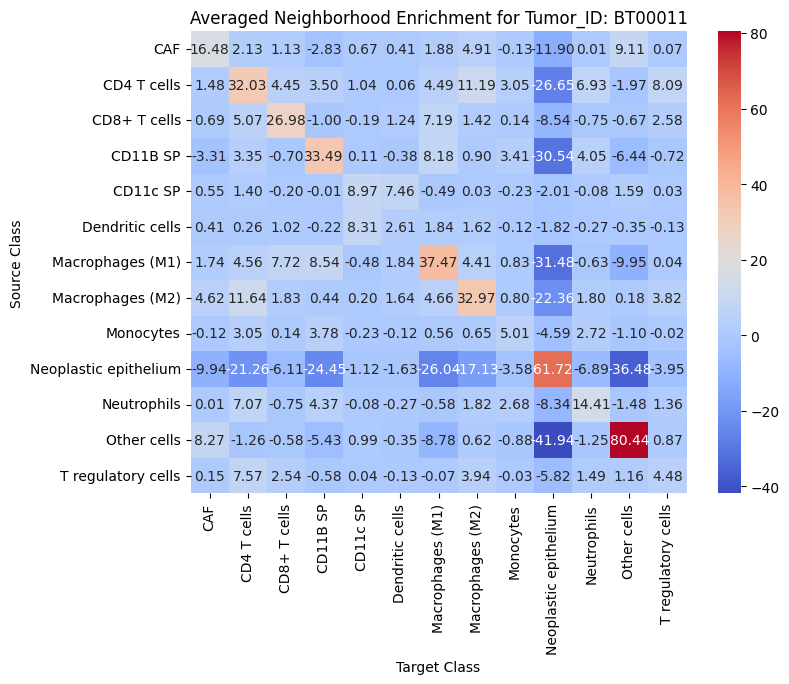

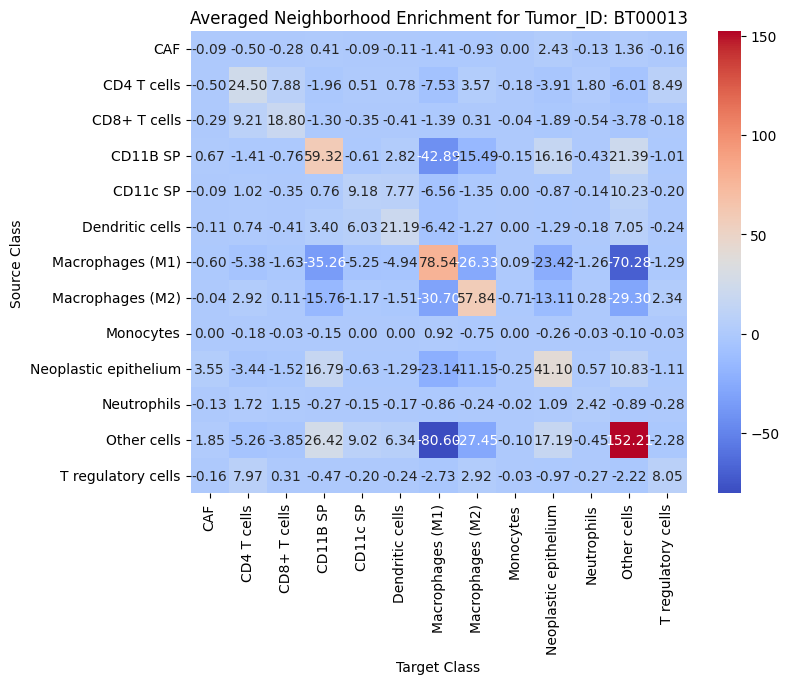

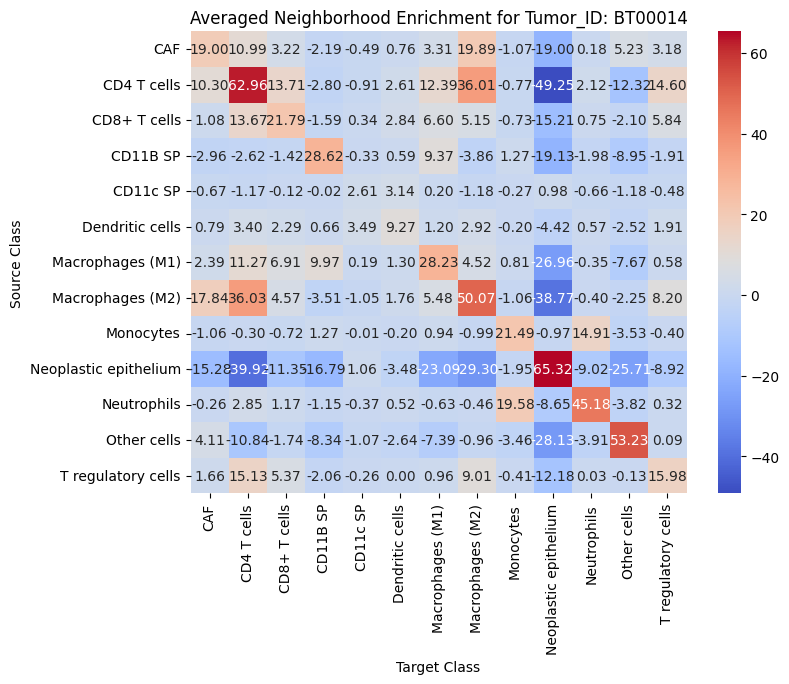

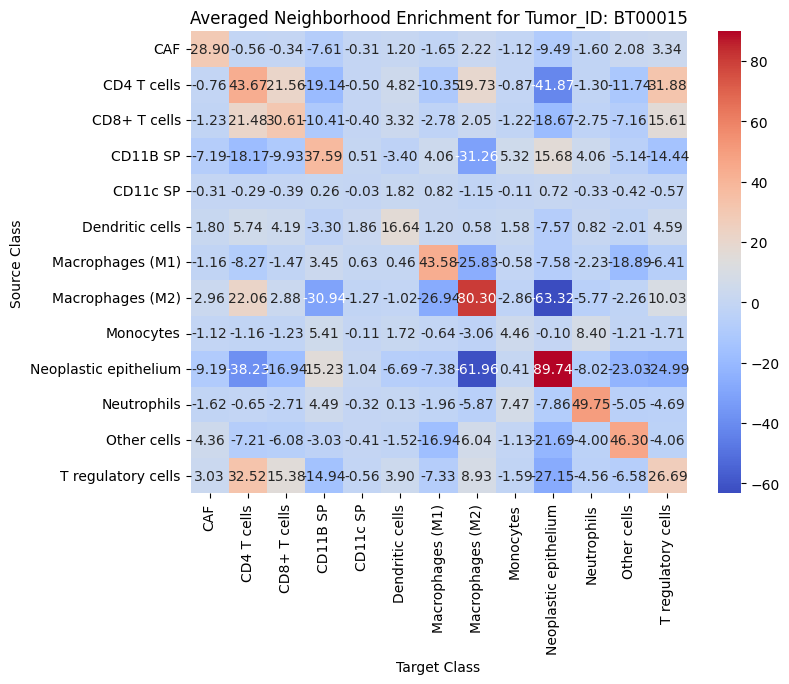

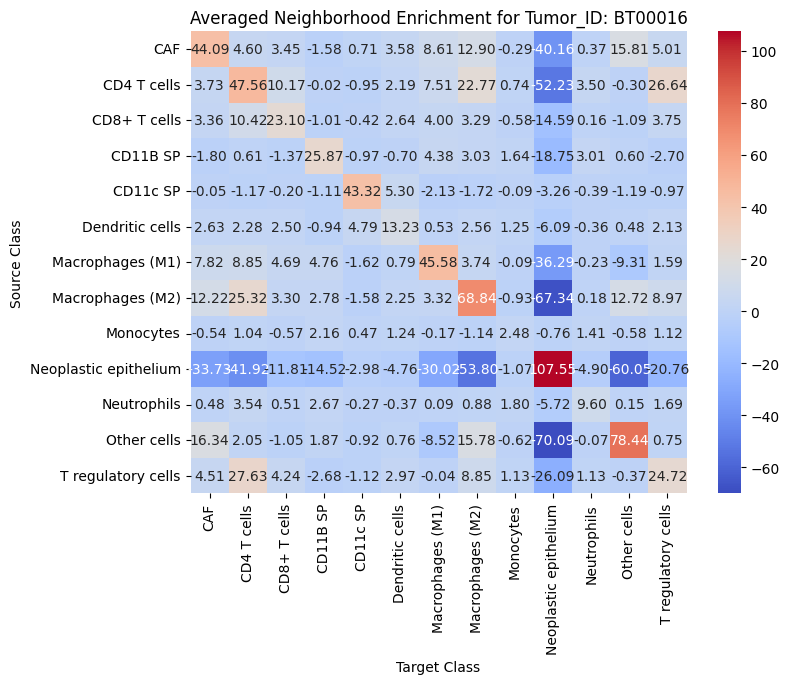

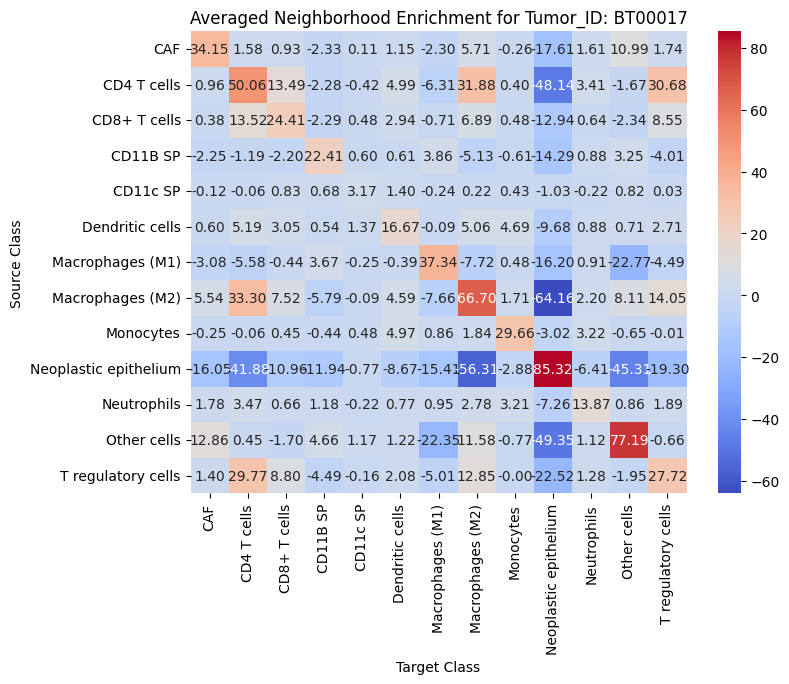

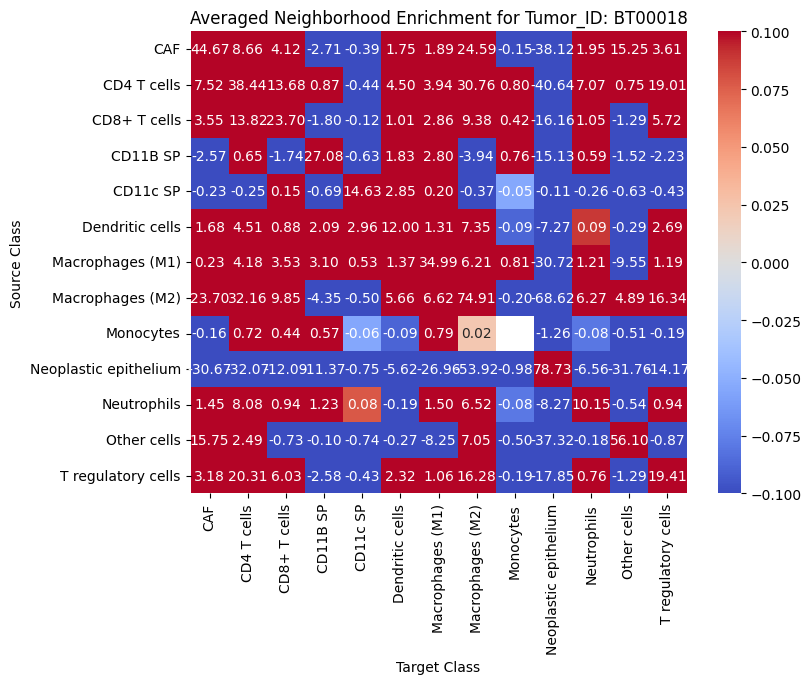

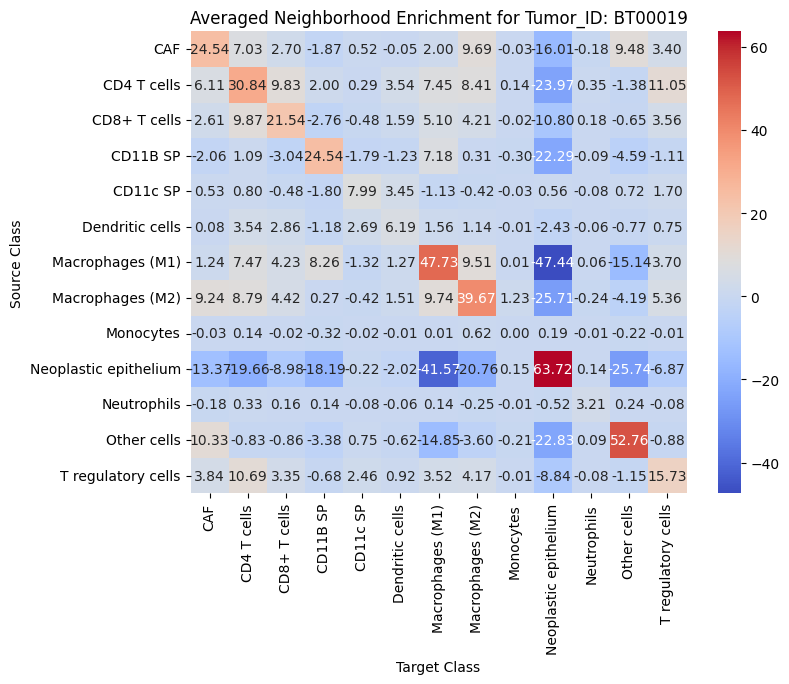

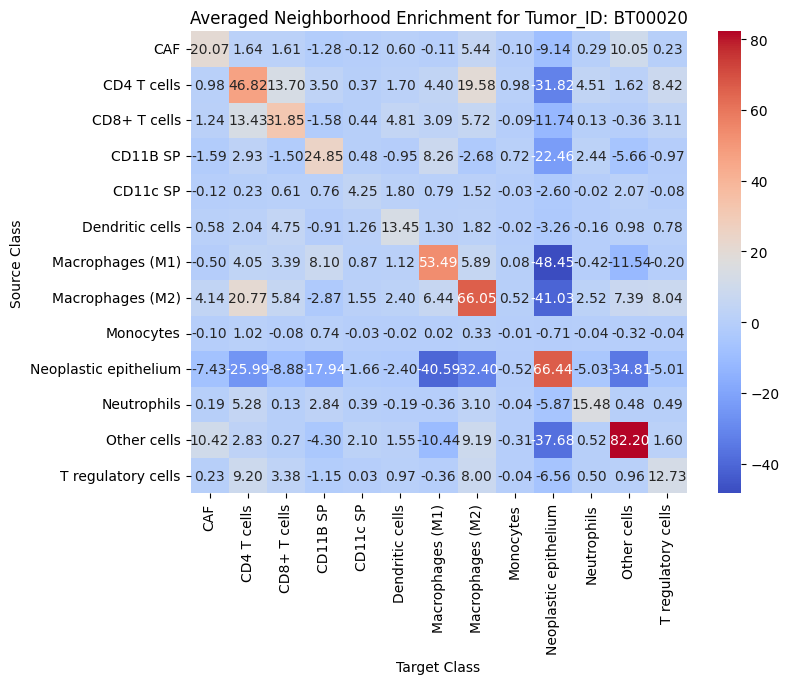

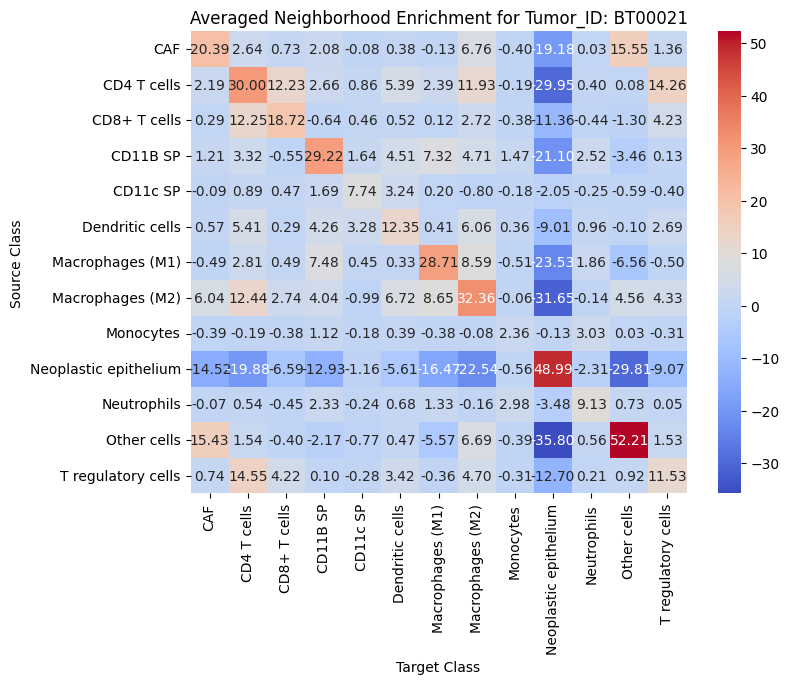

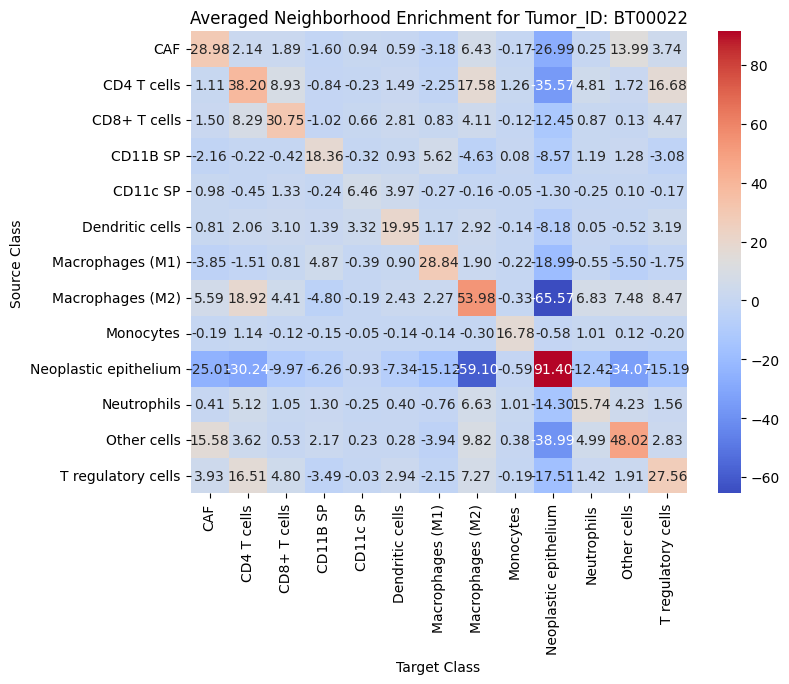

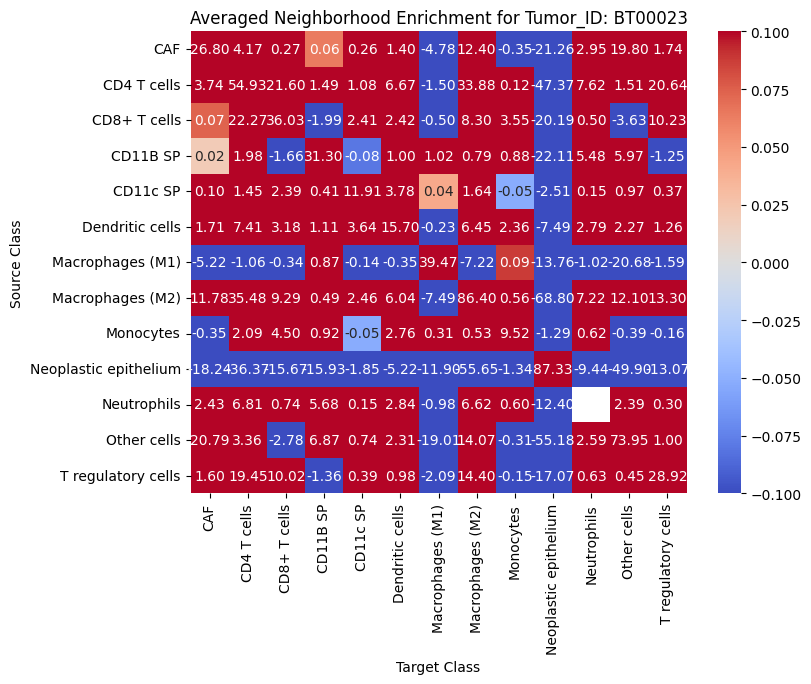

In [16]:
#plotting
import seaborn as sns
# Visualize Tumor-Level Heatmaps
for tumor_id, avg_matrix in tumor_enrichment.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        avg_matrix,
        xticklabels=adata.obs['class'].cat.categories,
        yticklabels=adata.obs['class'].cat.categories,
        cmap="coolwarm",
        annot=True, 
        fmt=".2f"
    )
    plt.title(f"Averaged Neighborhood Enrichment for Tumor_ID: {tumor_id}")
    plt.xlabel("Target Class")
    plt.ylabel("Source Class")
    plt.savefig(f"random_export/neighborhood_enrichment_{tumor_id}.png",
                bbox_inches='tight')
    plt.show()

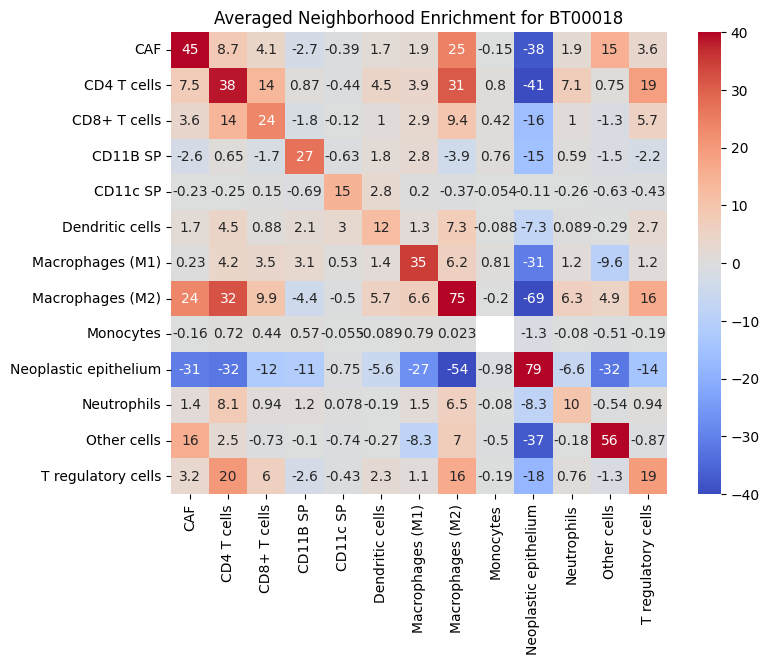

In [27]:
# Example: Visualize one tumor's enrichment matrix
#also fix the scale.. 
    #i actually needed to redo this one anyway, because the automatic scale was off. increase it to 40  
avg_matrix = tumor_enrichment["BT00018"]
plt.figure(figsize=(8, 6))
sns.heatmap(avg_matrix, xticklabels=all_class, yticklabels=all_class, cmap="coolwarm", annot=True, 
                vmin=-40, vmax=40)
plt.title(f"Averaged Neighborhood Enrichment for BT00018")
plt.savefig(f"heatmaps_per_tumor/redo_neighborhood_enrichment_BT00018.png",
                bbox_inches='tight')
plt.show()

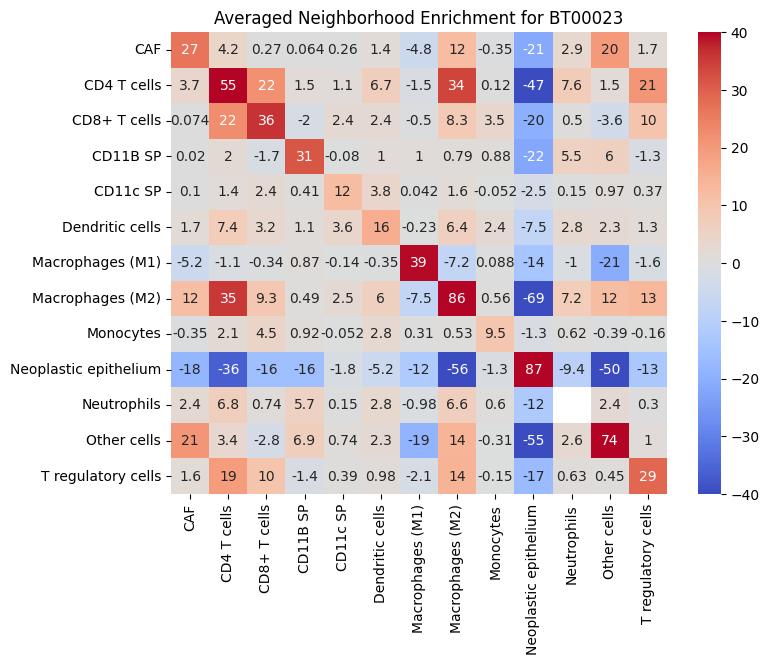

In [28]:
#Example 2
avg_matrix = tumor_enrichment["BT00023"]
plt.figure(figsize=(8, 6))
sns.heatmap(avg_matrix, xticklabels=all_class, yticklabels=all_class, cmap="coolwarm", annot=True, 
                vmin=-40, vmax=40)
plt.title(f"Averaged Neighborhood Enrichment for BT00023")
plt.savefig(f"heatmaps_per_tumor/redo_neighborhood_enrichment_BT00023.png",
                bbox_inches='tight')
plt.show()

In [ ]:
import seaborn as sns
# Visualize Tumor-Level Heatmaps
for tumor_id, avg_matrix in tumor_enrichment.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        avg_matrix,
        xticklabels=adata.obs['class'].cat.categories,
        yticklabels=adata.obs['class'].cat.categories
    )